In [1]:
from load_data import load
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, SpatialDropout2D
from tensorflow.keras import regularizers

In [3]:
(train_data, train_labels, test_data, test_labels) = load()

In [ ]:
train_data.shape

In [ ]:
plt.imshow(train_data[7])

In [33]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D())
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 8, 8, 256)        

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
sm_cb = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='../models/deep_net_weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(train_data, train_labels, epochs=30, verbose=2, validation_split=0.2, shuffle=True, callbacks=[es_cb, sm_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: val_loss improved from inf to 1.48931, saving model to ../models/deep_net_weights.hdf5
40000/40000 - 15s - loss: 1.8055 - accuracy: 0.3372 - val_loss: 1.4893 - val_accuracy: 0.4344
Epoch 2/30

Epoch 00002: val_loss improved from 1.48931 to 1.31254, saving model to ../models/deep_net_weights.hdf5
40000/40000 - 15s - loss: 1.3947 - accuracy: 0.4931 - val_loss: 1.3125 - val_accuracy: 0.5383
Epoch 3/30

Epoch 00003: val_loss improved from 1.31254 to 1.17109, saving model to ../models/deep_net_weights.hdf5
40000/40000 - 15s - loss: 1.1998 - accuracy: 0.5730 - val_loss: 1.1711 - val_accuracy: 0.5839
Epoch 4/30

Epoch 00004: val_loss improved from 1.17109 to 1.06707, saving model to ../models/deep_net_weights.hdf5
40000/40000 - 14s - loss: 1.0814 - accuracy: 0.6166 - val_loss: 1.0671 - val_accuracy: 0.6274
Epoch 5/30

Epoch 00005: val_loss improved from 1.06707 to 1.06351, saving model to ../models/deep_net_weights.hdf

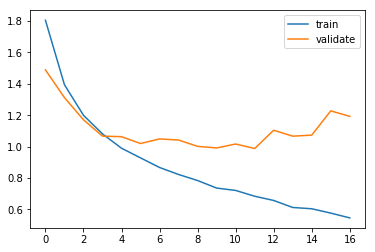

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validate'], loc='upper right')

In [39]:
test_labels = np.array(test_labels, dtype='uint8')
model.load_weights('../models/deep_net_weights.hdf5')
model.evaluate(test_data, test_labels, verbose=0)

[1.072318554496765, 0.666]

In [41]:
from tensorflow.keras.models import load_model
model = load_model('../models/best_so_far.hdf5')
model.evaluate(test_data, test_labels, verbose=0)

[0.8497288685798645, 0.7188]